# Step 1:- Importing Important Libraries


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from pandas.plotting import scatter_matrix

# For Regression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV

# For Binary Classification
from sklearn import metrics

from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Step 2:- Data Profiling

### About the dataset
___Training Data:___  The aircraft engine run-to-failure data.
[download trianing data](http://azuremlsamples.azureml.net/templatedata/PM_train.txt)  
___Test Data:___ The aircraft engine operating data without failure events recorded.
[download test data](http://azuremlsamples.azureml.net/templatedata/PM_test.txt)  
___Ground Truth Data:___ The true remaining cycles for each engine in the testing data.
[download truth data](http://azuremlsamples.azureml.net/templatedata/PM_truth.txt)  

For simplicity, data files have been downloaded to local Data folder.

### Data Columns

•	__id__: is the engine ID, ranging from 1 to 100  
•	__cycle__: per engine sequence, starts from 1 to the cycle number where failure had happened (trining data only) 
•	__setting1__ to __setting3__: engine operational settings  
•	__s1__ to __s21__: sensors measurements  


In [2]:
#dataset column names:

col_names = ['id','cycle','setting1','setting2',
             'setting3','s1','s2','s3','s4','s5',
             's6','s7','s8','s9','s10','s11','s12'
             ,'s13','s14','s15','s16','s17','s18',
             's19','s20','s21']


### Load Training Data

In [3]:
# Training Data
df_train_raw = pd.read_csv('data/PM_train.txt', sep = ' ', header=None)
df_train_raw.head()




,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


# Step 3:- Data Cleaning

In [4]:
# Drop extra space columnn
df_train_raw.drop([26,27], axis=1, inplace=True)

# Assign column names
df_train_raw.columns = col_names

# Brief Dataset description
df_train_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


#### Some insights:
- There are 100 engines.
- Each engine has between 1 to 362 cycles (average of 108 cycles per engine).
- The last cycle for each engine represents the cycle when failure had happened.

#### *To check for Data Types*

In [5]:
df_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

#### *To check for Missing Values*

In [6]:
df_train_raw.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

*So all columns are **numeric**, and **no missing value** is found.*

### Loading Testing Data

In [7]:
df_test_raw = pd.read_csv('data/PM_test.txt', sep = ' ', header=None)
df_test_raw.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [8]:
# Drop extra space columnn
df_test_raw.drop([26,27], axis=1, inplace=True)

# Assign column names
df_test_raw.columns = col_names

# Brief test data description
df_test_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,...,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,0.000000,0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


### Some inghts about test data:
- Same as training data, there are 100 engines.
- Each engine has between 1 to 303 cycles (average of 76 cycles per engine).
- But this time, failure cycle was not provided.

**Failure events for test data - remaining cycles before failure (TTF) - were provided in a separate truth file.**

### Loading Truth Data


In [9]:
# Load the truth data - actual 'ttf' for test data
df_truth = pd.read_csv('data/PM_truth.txt', sep = ' ', header=None)
df_truth.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [10]:
# Drop extra empty column in the truth data and rename remaining 'ttf'

df_truth.drop([1], axis=1, inplace=True)
df_truth.columns = ['ttf']
df_truth.head()

,ttf
0,112
1,98
2,69
3,82
4,91


In [11]:
# Get some stat on truth data

df_truth.describe()

,ttf
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


- To get meaningful test data, we need to merge the truth data (TTF) with last cycle for each engine in the test data. 
- This will give us a test set of 100 engines with their TTF data. 
- Will do that later when we create regression and classification labels for both training and test data.

But now let us add some features to smooth the sensors reading: rolling average and rolling standard deviation.

# Step 4:- Feature extraction

*Creating helper function to create features based on smoothing the time series for sensors by adding rolling mean and rolling standard deviation*

In [12]:

def add_features(df_in, rolling_win_size):
    
    """Add rolling average and rolling standard deviation for sensors readings using fixed rolling window size.
    
    Args:
            df_in (dataframe)     : The input dataframe to be proccessed (training or test) 
            rolling_win_size (int): The window size, number of cycles for applying the rolling function
        
    Reurns:
            dataframe: contains the input dataframe with additional rolling mean and std for each sensor
    
    """
    
    sensor_cols = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_engine = df_in[df_in['id'] == m_id]
        df_sub = df_engine[sensor_cols]

    
        # get rolling mean for the subset
        av = df_sub.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_engine,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out

*Create helper function to add the regression and classification labels to the training data.*

In [13]:

def prepare_train_data (df_in, period):
    
    """Add regression and classification labels to the training data.

        Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
          
    """
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace=True)
    
    #create binary classification label
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

*Creating helper function to add the regression and classification labels to the training data.*

In [14]:

def prepare_test_data(df_test_in, df_truth_in, period):
    
    """Add regression and classification labels to the test data.

        Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data
        Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
        Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 2
        
      Args:
          df_in (dataframe): The input training data
          period (int)     : The number of cycles for TTF segmentation. Used to derive classification labels
          
      Returns:
          dataframe: The input dataframe with regression and classification labels added
    

    
    """
    
    df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
    
    df_tst_last_cycle.reset_index(level=0, inplace=True)
    df_tst_last_cycle.columns = ['id', 'last_cycle']
    
    df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')


    df_test_in = df_test_in[df_test_in['cycle'] == df_test_in['last_cycle']]

    df_test_in.drop(['last_cycle'], axis=1, inplace=True)
    
    df_test_in.reset_index(drop=True, inplace=True)
    
    df_test_in = pd.concat([df_test_in, df_truth], axis=1)
    
    #create binary classification label
    df_test_in['label_bnc'] = df_test_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_test_in['label_mcc'] = df_test_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)

    return df_test_in

**With the help of these functions, let us prepare training and test data by adding features and labels.**

### Preparing Training Data


In [15]:
# Adding extracted features to training data

df_train_fx = add_features(df_train_raw, 5)

# Adding labels to training data using period of 30 cycles for classification

df_train = prepare_train_data (df_train_fx, 30)
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


### **Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the training data.**

Let us save the dataframe for later use in data exploration and modeling phases.

### Preparing the Test data

In [18]:
# Adding extracted features to test data

df_test_fx = add_features(df_test_raw, 5)

# Add labels to test data using period of 30 cycles for classification

df_test = prepare_test_data(df_test_fx, df_truth, 30)
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


### **Rolling average, rolling standard deviation, regression labels, and classification labels have been added to the test data.**

# Step 5: Saving to CSV File
Let us save the dataframe for later use in data exploration and modeling phases


In [19]:
# Saving the training data to csv file for later use
df_train.to_csv('data/train.csv', index=False)

# Saving the test data to csv file for later use
df_test.to_csv('data/test.csv', index=False)


 # Step 6: Exploratory Data Analysis

In [20]:
# Load training data prepared previuosly

df_tr_lbl = pd.read_csv('data/train.csv')
df_tr_lbl.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [21]:
# Exclude enging id and cycle number from the input features:

features = ['setting1','setting2','setting3',
           's1','s2','s3','s4','s5','s6','s7',
           's8','s9','s10','s11','s12','s13',
           's14','s15','s16','s17','s18','s19',
           's20','s21']

<AxesSubplot:title={'center':'Features Standard Deviation'}>

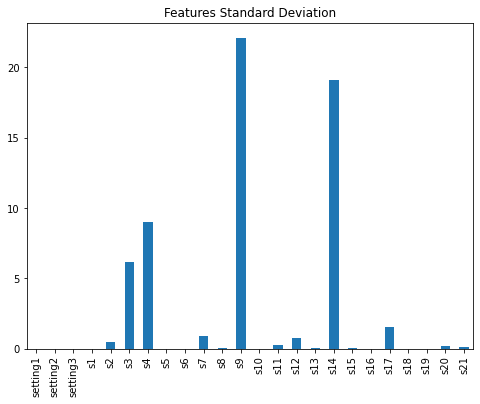

In [22]:
# Plotting and compare the standard deviation of input features:

df_tr_lbl[features].std().plot(kind='bar', figsize=(8,6),
                               title="Features Standard Deviation")

<AxesSubplot:title={'center':'Features Standard Deviation (log)'}>

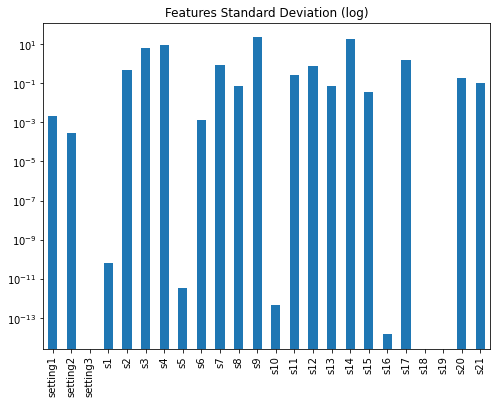

In [23]:
# Plotting and compare the log standard deviation of input features:

df_tr_lbl[features].std().plot(kind='bar', figsize=(8,6),
                               logy=True,title="Features Standard Deviation (log)")

In [25]:
# Get ordered list of top variance features:

featurs_top_var = df_tr_lbl[features].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s1          6.537152e-11
s5          3.394700e-12
s10         4.660829e-13
s16         1.556432e-14
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

In [26]:
# Get ordered list features correlation with regression label ttf

df_tr_lbl[features].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -6.041754e-16
s5         -6.041754e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [27]:
# list of features having low or no correlation with regression label ttf and very low or no variance
# These features will be target for removal in feature selection

low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,20631.0,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000
mean,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000002,-0.000009
std,0.0,6.537152e-11,4.660829e-13,0.0,0.0,1.556432e-14,3.394700e-12,0.000293,0.002187
min,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000600,-0.008700
25%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000200,-0.001500
50%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000000,0.000000
75%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000300,0.001500
max,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000600,0.008700


**Some insights:-**
['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11'] could be target for feature selection during modeling since their correlation with TTF is higher than other features.

**Let us display this correlation in heatmap**

In [30]:
# List of features having high correlation with regression label ttf

correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_tr_lbl[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,521.413470,553.367711,23.289705,38.816271,21.609803,8143.752722,9065.242941,2388.096152,2388.096652,1590.523119,393.210654,642.680934,8.442146,1408.933782,47.541168
std,0.737553,0.885092,0.108251,0.180746,0.001389,19.076176,22.082880,0.071919,0.070985,6.131150,1.548763,0.500053,0.037505,9.000605,0.267087
min,518.690000,549.850000,22.894200,38.140000,21.600000,8099.940000,9021.730000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,520.960000,552.810000,23.221800,38.700000,21.610000,8133.245000,9053.100000,2388.040000,2388.050000,1586.260000,392.000000,642.325000,8.414900,1402.360000,47.350000
50%,521.480000,553.440000,23.297900,38.830000,21.610000,8140.540000,9060.660000,2388.090000,2388.090000,1590.100000,393.000000,642.640000,8.438900,1408.040000,47.510000
75%,521.950000,554.010000,23.366800,38.950000,21.610000,8148.310000,9069.420000,2388.140000,2388.140000,1594.380000,394.000000,643.000000,8.465600,1414.555000,47.700000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8293.720000,9244.590000,2388.560000,2388.560000,1616.910000,400.000000,644.530000,8.584800,1441.490000,48.530000


In [31]:
# Adding the regression label 'ttf' to the list of high corr features 
correl_featurs_lbl = correl_featurs + ['ttf']

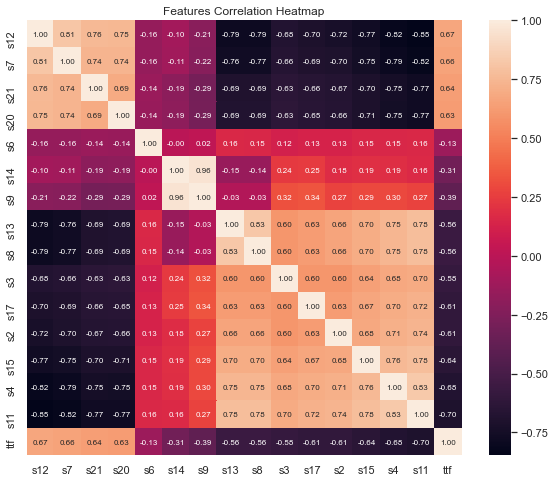

In [35]:
# Plotting a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True, fmt='.2f',
                 annot_kws={'size': 8},
                 yticklabels=correl_featurs_lbl,
                 xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

**Some Insights:-**
- Most of the features have normal distribution which has positve effect on machine learning algorithms.

- Most of the features have non-linear relationship with the regression label ttf, so using polynomial models may lead to better results.

**Let us create a helper function to ease exploration of each feature invidually:**

In [36]:

def explore_col(s, e):
    
    """Plot 4 main graphs for a single feature.
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots
    
    """
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

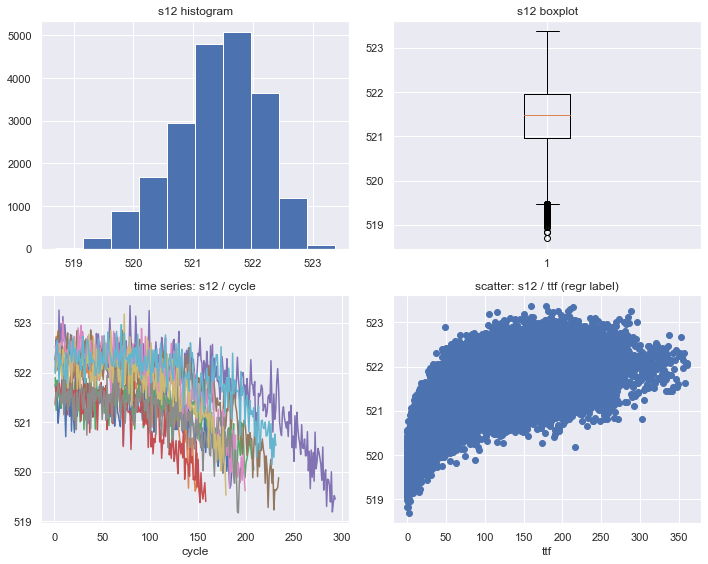

In [37]:
explore_col("s12", 10)

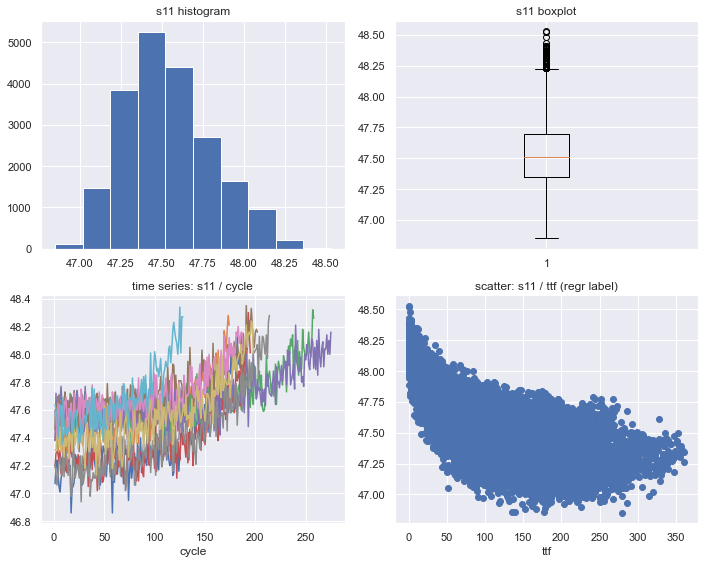

In [38]:
explore_col("s11", 10)

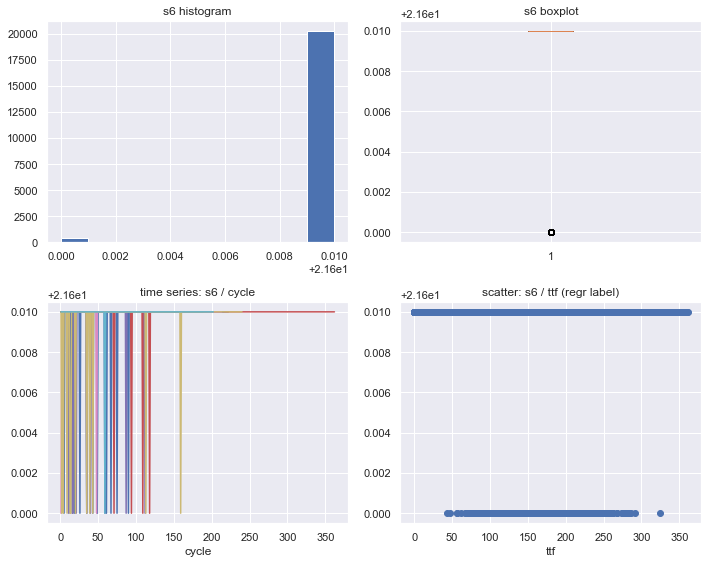

In [39]:
explore_col("s6", 10)

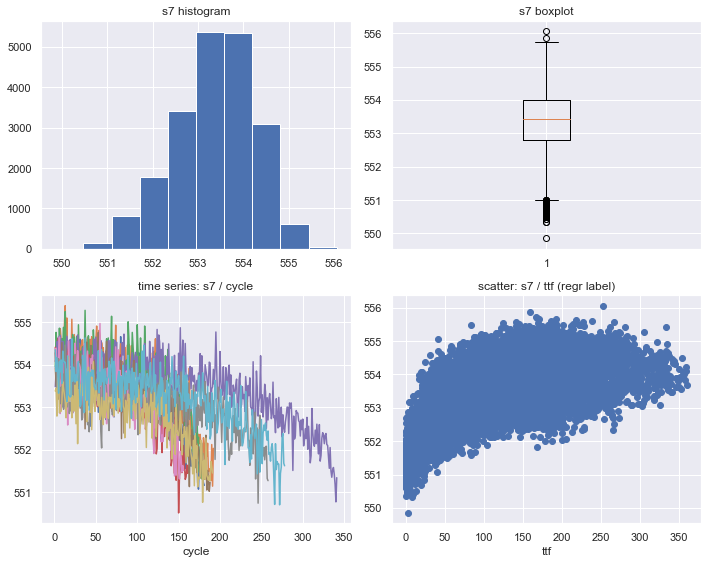

In [40]:
explore_col("s7", 10)

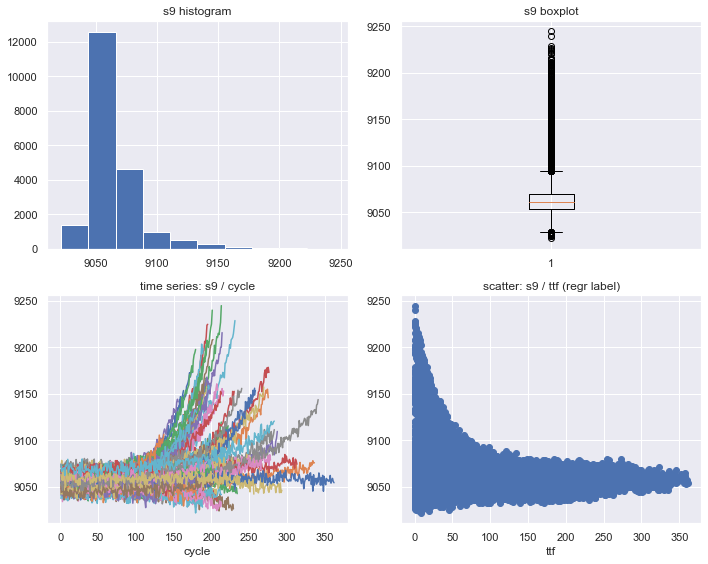

In [41]:
explore_col("s9", 100)

In [42]:
# Create a function to explore the time series plot each sensor selecting random sample engines

def plot_time_series(s):
    
    """Plot time series of a single sensor for 10 random sample engines.
    
        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots
        
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()




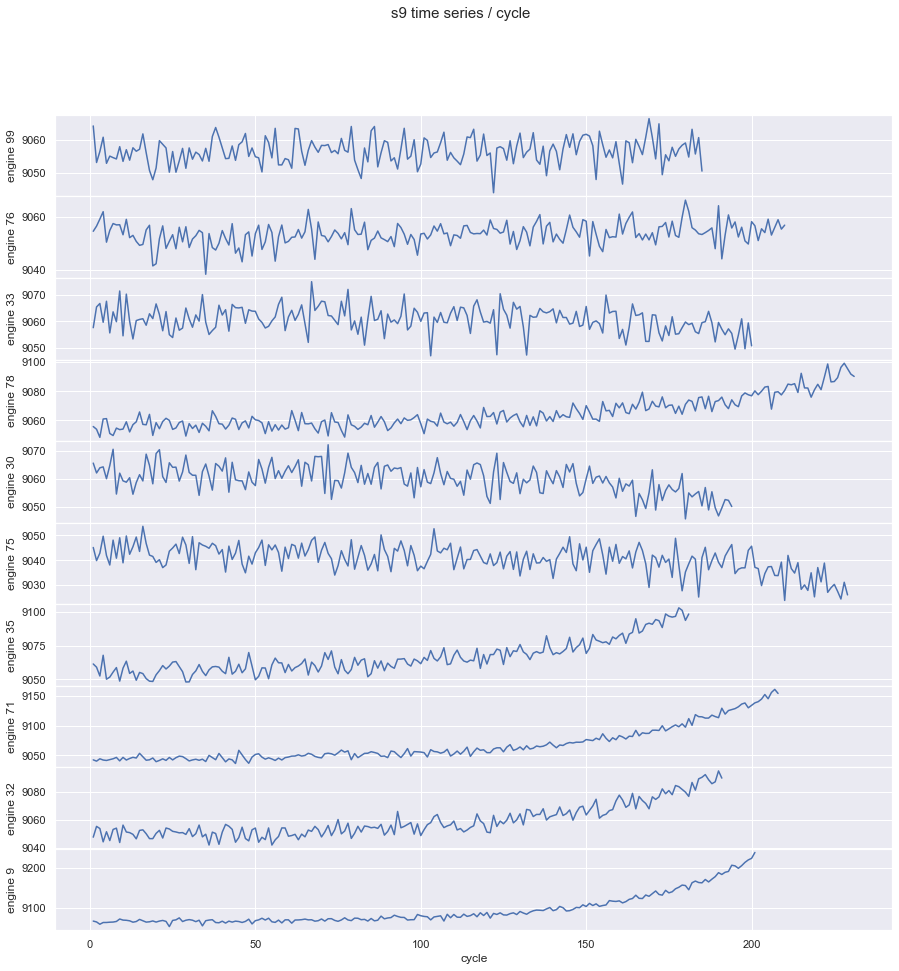

In [43]:
plot_time_series('s9')

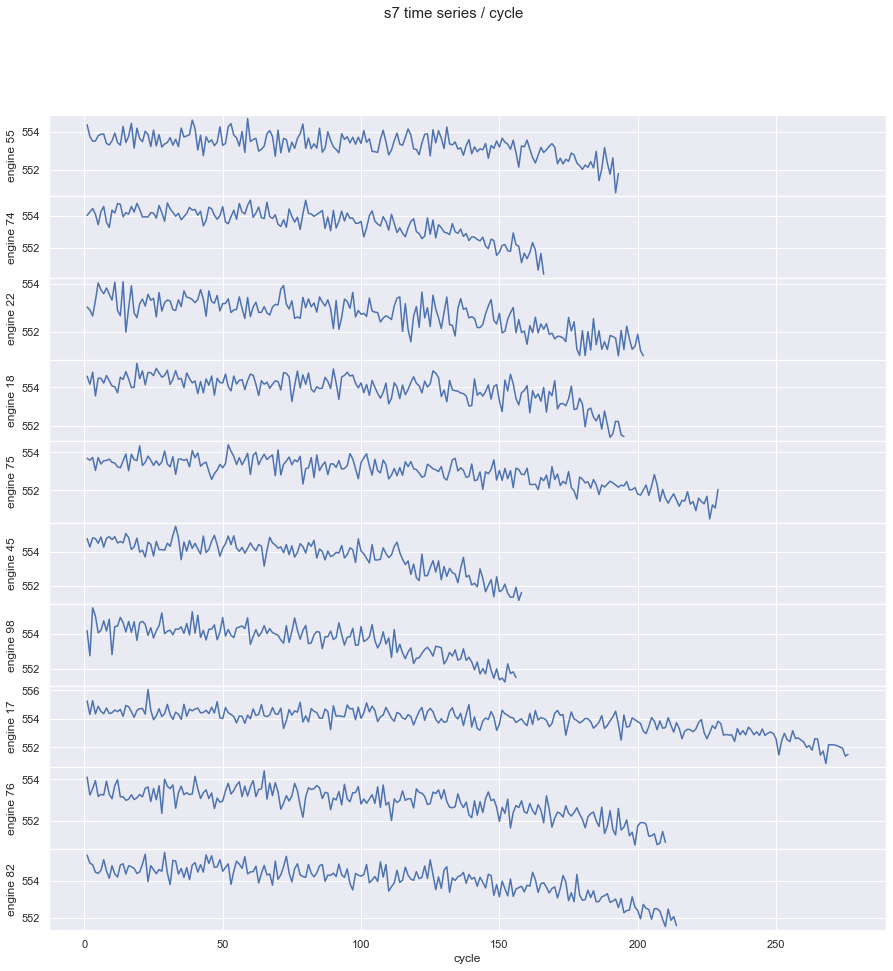

In [44]:
plot_time_series('s7')

#### Let us check some stat on the classifcation labels:

In [45]:
# Printing stat for binary classification label

print(df_tr_lbl['label_bnc'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[0]/df_tr_lbl['label_bnc'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[1]/df_tr_lbl['label_bnc'].count()))

0    17531
1     3100
Name: label_bnc, dtype: int64

Negaitve samples =  85%

Posiitve samples =  15%


**Note:**
*This is clearly unbalanced dataset, so we should not depend on classification Accuracy as a model performance metric. We can use AUC ROC instead.*

In [46]:
# Printing stat for multiclass classification label

print(df_tr_lbl['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[0]/df_tr_lbl['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[1]/df_tr_lbl['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[2]/df_tr_lbl['label_mcc'].count()))

0    17531
2     1600
1     1500
Name: label_mcc, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%


*Also, here we should use AUC ROC for classification evaluation.*

### EDA Summary:
-  There is a very high correlation (> 0.8) between some features e.g.(s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). This multicollinearity may hurt the performance of some machine learning algorithms. So, part of these features will be target for elimination in feature selection during the modeling phase.  
-  Most features have nonlinear relation with the TTF, hence adding their polynomial transforms may enhance models performance.
-  Most features exhibit normal distribution which is likely improves models performance. 
-  AUC ROC should be used for classification models evaluation instead of Accuracy due to class’s imbalance in the training data.

# Step 7: Model Selection - Regression

In [48]:
# Loading training and testing data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')




### Regression Modelling
Segment training and test data into features dataframe and labels series.  

To make it easy to train models on different set of features, a variable to hold the set of features required was used to subset the original dataframes

In [49]:
#Prepare data for regression model

# original features
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_adxf = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21']

# features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

# a variable to hold the set of features to experiment with
features = features_orig


X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']

In [50]:
# Creating a helper function to calculate regression metrics.
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [51]:
# Creating a helper function to plot the coefficients weights or feature importance
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """Plot regression coefficients weights or feature importance.
    
    Args:
        model (str): The model name identifier
        weights (array): Contains the regression coefficients weights or feature importance
        feature_names (list): Contains the corresponding features names
        weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
        
    Returns:
        plot of either regression coefficients weights or feature importance
        
    
    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None
    

In [52]:
# Creating a helper function to plot the regression residuals.
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """Print the regression residuals.
    
    Args:
        model (str): The model name identifier
        y_train (series): The training labels
        y_train_pred (series): Predictions on training data
        y_test (series): The test labels
        y_test_pred (series): Predictions on test data
        
    Returns:
        Plot of regression residuals
    
    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()
    
    

**Using the above functions let us model and evaluate some regression algorithms**

In [53]:
# linear regression

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics


R^2 training: 0.580, R^2 test: 0.405


,Linear Regression
Root Mean Squared Error,32.041095
Mean Absolute Error,25.591780
R^2,0.405495
Explained Variance,0.665297


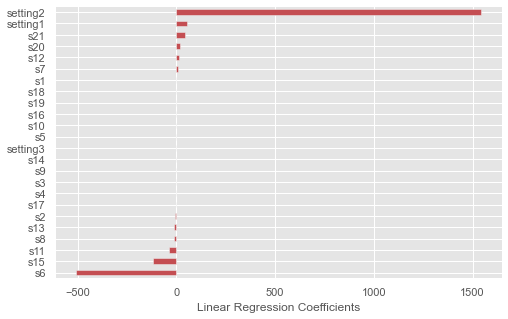

In [54]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

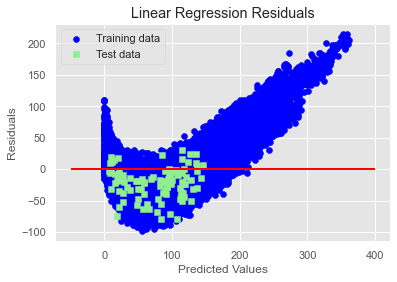

In [55]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

In [56]:
# LASSO Regression

lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics


R^2 training: 0.579, R^2 test: 0.408


,LASSO
Root Mean Squared Error,31.966099
Mean Absolute Error,25.551808
R^2,0.408275
Explained Variance,0.668206


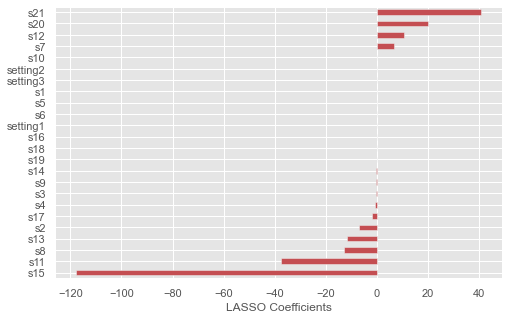

In [57]:
plot_features_weights('LASSO', lasso.coef_, X_train.columns, 'c')

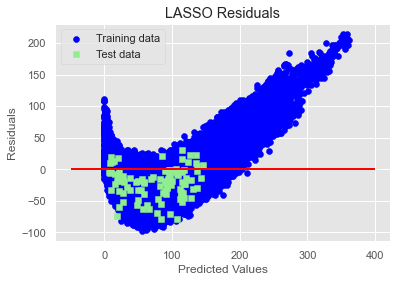

In [58]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

In [59]:
# Ridge Regression

rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.580, R^2 test: 0.408


,Ridge Regression
Root Mean Squared Error,31.965740
Mean Absolute Error,25.544620
R^2,0.408289
Explained Variance,0.667607


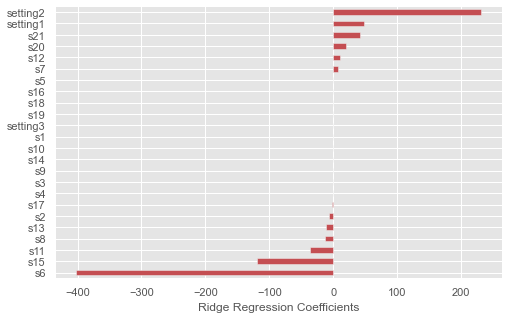

In [60]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

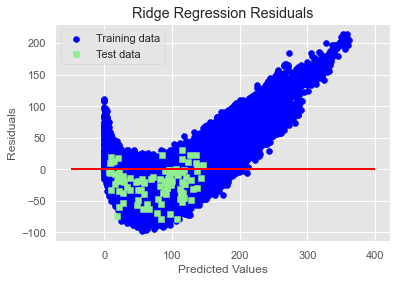

In [61]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

In [62]:
# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics




R^2 training: 0.627, R^2 test: 0.401


,Polynomial Regression
Root Mean Squared Error,32.157751
Mean Absolute Error,24.713594
R^2,0.401159
Explained Variance,0.645164


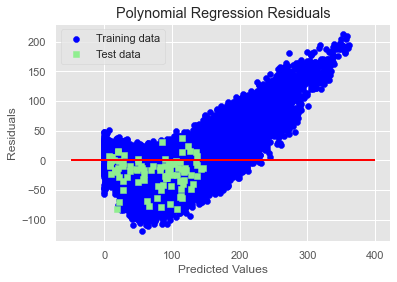

In [63]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

**Polynomial Regression has scored better than linear models.**

In [64]:
# Decision Tree regressor

#dtrg = DecisionTreeRegressor(max_depth=8, max_features=5, random_state=123) # selected features
dtrg = DecisionTreeRegressor(max_depth=7, random_state=123)
dtrg.fit(X_train, y_train)

y_test_predict = dtrg.predict(X_test)
y_train_predict = dtrg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

dtrg_metrics = get_regression_metrics('Decision Tree Regression', y_test, y_test_predict)
dtrg_metrics

R^2 training: 0.625, R^2 test: 0.403


,Decision Tree Regression
Root Mean Squared Error,32.095349
Mean Absolute Error,24.319068
R^2,0.403480
Explained Variance,0.632767


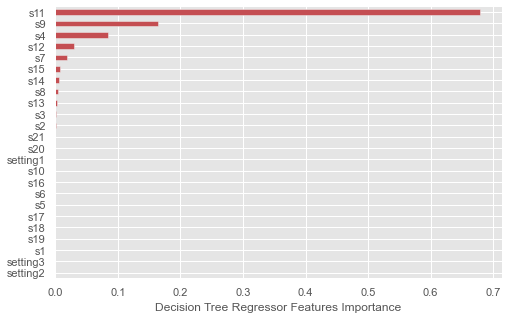

In [65]:
plot_features_weights('Decision Tree Regressor', dtrg.feature_importances_, X_train.columns, 't' )

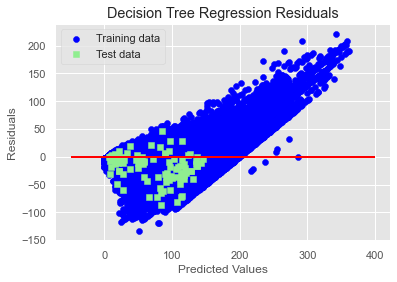

In [66]:
plot_residual('Decision Tree Regression', y_train_predict, y_train, y_test_predict, y_test)

In [68]:
# Random Forest

#rf = RandomForestRegressor(n_estimators=100, max_features=2, max_depth=4, n_jobs=-1, random_state=1) # selected features
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, n_jobs=-1, random_state=1) # original features
#rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=7, n_jobs=-1, random_state=1) # orig + extrcted 

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.594, R^2 test: 0.525


,Random Forest Regression
Root Mean Squared Error,28.634253
Mean Absolute Error,23.167130
R^2,0.525198
Explained Variance,0.767320


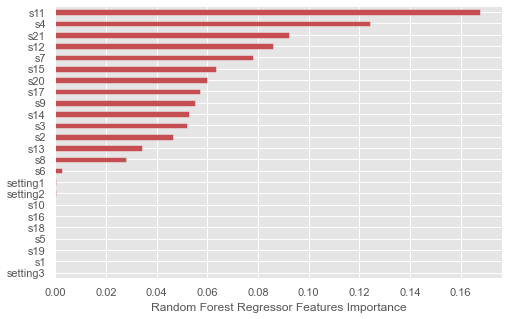

In [69]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns, 't' )

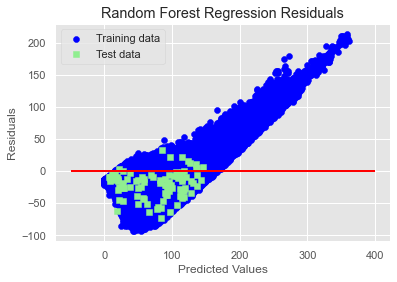

In [70]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

### Viewing Predicted Values

In [71]:
# view predictions vs actual

rf_pred_dict = {
                'Actual' : y_test,
                'Prediction' : y_test_predict
            }
    
rf_pred = pd.DataFrame.from_dict(rf_pred_dict).T
rf_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Actual,112.000000,98.000000,69.000000,82.000000,91.00000,93.000000,91.000000,95.000000,111.00000,96.000000,...,38.000000,20.000000,85.00000,55.000000,128.000000,137.000000,82.000000,59.000000,117.000000,20.00000
Prediction,151.578408,119.268513,74.415647,96.470907,112.59338,130.279445,128.114019,100.692144,116.11839,127.369752,...,40.976045,33.031218,51.39622,64.318328,143.657061,159.663783,100.027659,103.182456,157.063688,35.62655


### Comparing all regression models tested


In [72]:
# Regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics, rdg_metrics, dtrg_metrics, polyreg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Ridge Regression,Decision Tree Regression,Polynomial Regression,Random Forest Regression
Root Mean Squared Error,32.041095,31.966099,31.965740,32.095349,32.157751,28.634253
Mean Absolute Error,25.591780,25.551808,25.544620,24.319068,24.713594,23.167130
R^2,0.405495,0.408275,0.408289,0.403480,0.401159,0.525198
Explained Variance,0.665297,0.668206,0.667607,0.632767,0.645164,0.767320


### Regression Summary

In accordance with our analysis in the data exploratory phase, non-linear regression models like Polynomial and Random Forest performed better than linear models like OLS, LASSO and Ridge regression. Random Forest clearly outperformed other models scoring RMSE of 28.63 cycles, i.e. the model predicts TTF within average error range of ±28.63 cycles.

The hyper-parameter tuning for the Random Forest Regressor, LASSO, and Ridge models was done manually, but Grid Search or Random Search with Cross Validation could be used for better processing.


# Step 8: Model Selection - Binary Classification

In [75]:
## Covered in new jupyter notebook

# Step 9: Model Selection - Multi Classification

In [74]:
## Covered in new jupyter notebook